In [1]:
# Import the necessary packages
import dask.dataframe as dd
import dask
from dask.distributed import Client
from sklearn import linear_model
import matplotlib.pyplot as plt

In [2]:
# Read in the data
def readData(file):
    datadf = dd.read_csv(file, parse_dates=['sold_date'], infer_datetime_format=True)
    return datadf

In [3]:
# Use a linear regression function (expected input groupby)
def groupbyRegr(data):
    groupRegr = linear_model.LinearRegression()
    return groupRegr.fit(data[['bed', 'bath', 'acre_lot', 'house_size']], data['price'])

In [4]:
# Use a groupby function for a linear regression for each zip code
def zipGroupArray(data):
    return data.groupby('zip_code').apply(groupbyRegr)

In [5]:
# Predict values for the linear regression
def prediction(data, groupedData, zipCode):
    return groupedData[zipCode].predict(data[data['zip_code']==zipCode].loc[:,['bed', 'bath', 'acre_lot', 'house_size']])

In [18]:
# Plot data predictions against actual data
def plotPrediction(data, zipCode, predictions):
    x, yActual, yPredicted = dask.compute(data[data['zip_code']==zipCode].loc[:,'acre_lot'], data[data['zip_code']==zipCode].loc[:,'price'], predictions)
    plt.scatter(x, yActual)
    plt.scatter(x, yPredicted)
    plt.show()
    pass

In [7]:
# Run all of the fuctions together as one unit
def runRegressor(data, zipCode):
    groupedData = zipGroupArray(data)
    predictions = prediction(data, groupedData, zipCode)
    plotPrediction(data, zipCode, predictions)
    pass

In [13]:
# Set file where data can be found
file = './datasets/realtor-data.csv'
    
# Set dataframe variable
datadf = readData(file)

In [9]:
def plotSample(samples):
    # Create a sample set of the data
    sample = datadf.head(1000)

    # Create a subset of the sample without NA values
    subSample = sample[['bed', 'bath', 'acre_lot', 'house_size', 'zip_code', 'price']].dropna()

    # Test the regressor on each zip code in the subset of the sample
    for eachCode in subSample['zip_code'].unique()[0:samples]:
        runRegressor(subSample, eachCode)

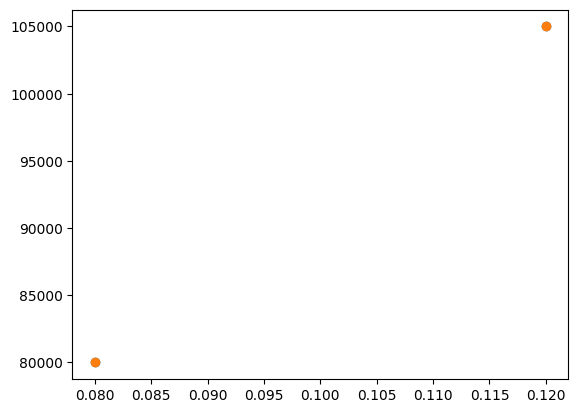

In [22]:
plotSample(1)

In [12]:
client = Client(n_workers=4)
client

/opt/python/3.10.4/lib/python3.10/site-packages/distributed/node.py:183: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 45951 instead
  warnings.warn(


Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:45951/status,
Dashboard: http://127.0.0.1:45951/status,Workers: 4
Total threads: 16,Total memory: 31.36 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:36255,Workers: 4
Dashboard: http://127.0.0.1:45951/status,Total threads: 16
Started: Just now,Total memory: 31.36 GiB
Comm: tcp://127.0.0.1:37111,Total threads: 4
Dashboard: http://127.0.0.1:41007/status,Memory: 7.84 GiB
Nanny: tcp://127.0.0.1:44609,


In [20]:
def plotData(plots):
    # Drop NA values for regression
    subSample = datadf[['bed', 'bath', 'acre_lot', 'house_size', 'zip_code', 'price']].dropna()

    # Test the regressor on each zip code in the subset of the sample
    for eachCode in subSample['zip_code'].unique()[0:plots]:
        runRegressor(subSample, eachCode)

In [23]:
plotData(1)

/tmp/ipykernel_3284/2273975501.py:3: UserWarning: `meta` is not specified, inferred from partial data. Please provide `meta` if the result is unexpected.
  Before: .apply(func)
  After:  .apply(func, meta={'x': 'f8', 'y': 'f8'}) for dataframe result
  or:     .apply(func, meta=('x', 'f8'))            for series result
  return data.groupby('zip_code').apply(groupbyRegr)


AttributeError: 'Series' object has no attribute 'predict'